In [1]:
import numpy as np
import decimal
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import cityblock
import glob
import statistics as st

from apollon.som.som import IncrementalMap
from apollon.som.utilities import best_match
from pathlib import Path
import pickle

import plotly.graph_objects as go
from sklearn import preprocessing #für normierung

## Prepare features

In [2]:
# dictionary of all features:
features = {1: 'PhaseSpace',
            2: 'ChannelCorrelation',
            3: 'PeakMeter',
            4: 'RMS',
            5: 'CrestFactor',
            6: 'PhaseSpaceLow',
            7: 'ChannelCorrelationLow',
            8: 'PeakMeterLow',
            9: 'RMSLow',
            10: 'CrestFactorLow',
            11: 'PhaseSpaceMid',
            12: 'ChannelCorrelationMid',
            13: 'PeakMeterMid',
            14: 'RMSMid',
            15: 'CrestFactorMid',
            16: 'PhaseSpaceHigh',
            17: 'ChannelCorrelationHigh',
            18: 'PeakMeterHigh',
            19: 'RMSHigh',
            20: 'CrestFactorHigh',
            21: 'bpm'}

# selection of preferred features
nfeatures = {0: 1,
             1: 2,
             2: 3,
             3: 4,
             4:5, 5:6, 6:7, 7:8, 8:9, 9:10, 10:11, 11:12, 12:13, 13:14, 14:15, 15:16, 16:17, 17:18, 18:19, 19:20, 20:21
            }
# shall we take each feratures' 'mean', 'median', standard deviation ('std'), skewness ('skew'), or kurtosis ('kurt')?
what=['median','median','median','median','median','median','median','median','median','median','median','median','median','median','median','median','median','median','median','median','median','median','median']
numfeatures = len(nfeatures)

#.csv Files of extracted features, see Example Notebook 'TimbreTrack_Extract_Features'
numfeatures = len(nfeatures)

measCsv=r'C:\Users\t_ziemer\Desktop\techno-hardcore-ambient'#'C:\Users\t_ziemer\Desktop\techno-csv-natyear
folds=glob.glob(str(measCsv+'\\*'))


In [3]:
train_X = np.array([np.zeros(numfeatures)])
target = []
color_map = {}

for cl, fold in enumerate(folds):
    files = glob.glob(str(fold+'\*.csv'))
    numfiles = len(files)
    lal1 = np.empty((numfiles, numfeatures))
    # print(fold)

    for j, f in enumerate(files):
        la = pd.read_csv(f, index_col=0)
        for dt, i in enumerate(nfeatures):
            if what[dt]=='median':
                lal1[j][i-1] = la[features[nfeatures[i]]].median()
            elif what[dt]=='mean':
                lal1[j][i-1] = la[features[nfeatures[i]]].mean()
            elif what[dt]=='std':
                lal1[j][i-1] = la[features[nfeatures[i]]].std()
            elif what[dt]=='skew':
                lal1[j][i-1] = la[features[nfeatures[i]]].skew()
            elif what[dt]=='kurt':
                lal1[j][i-1] = la[features[nfeatures[i]]].kurtosis()
            #else:
            #    print(lal1[j][i-1])
    train_X = np.concatenate((train_X, lal1))
    target = target + [(str(Path(fold).relative_to(measCsv)), i+1)
                       for i in range(0, len(lal1))]

    color_map[str(Path(fold).relative_to(measCsv))] = cl

train_X = train_X[1:]

## normieren

In [4]:
sc = preprocessing.StandardScaler()
#Alternatively, read previously stored scaler data
#with open('C:\python\models\llcoolj.pkl','rb') as f:
#    sc = pickle.load(f)

scaler = sc.fit(train_X) #skalieren die einzelen features auf Mean=0 und Std=1
train_X = scaler.transform(train_X)

Store normalization in File

In [3]:
import pickle
sompath = r'C:\python\models\2025-02-22all-21med.sav'
scalerpath = r'C:\python\models\2025-02-22all-21med.pkl'
# to save the scaler in a file:
with open(scalerpath,'wb') as f:
    pickle.dump(scaler, f)
#pickle.dump(som, open(sompath, 'wb'))
#som = pickle.load(open(sompath, 'rb'))
#scaler = pickle.load(open(scalerpath,'rb'))

NameError: name 'scaler' is not defined

## Fit SOM

In [7]:
dx = int(np.sqrt(train_X.shape[0]))+20#+4
dw = train_X.shape[1]
som = IncrementalMap((dx, dx, dw), n_iter=2000, eta=0.025, nhr=25)

In [8]:
som.fit(train_X)

In [9]:
pickle.dump(som, open(sompath, 'wb'))

## Results

### Plotly + json

load model and scaler:

In [9]:
#sompath = r'C:\python\models\all-21med-1-med-2med-3med.sav'
#scalerpath = r'C:\python\models\all-21med-1-med-2med-3med.pkl'
sompath = r'2025-02-22all-21med.sav'
#scalerpath = r'C:\python\models\all-21med-1-med-2med-3med.pkl'

som = pickle.load(open(sompath, 'rb'))
#scaler = pickle.load(open(scalerpath,'rb'))

FileNotFoundError: [Errno 2] No such file or directory: '2025-02-22all-21med.sav'

In [5]:
um = som.umatrix()
#JsonDict={"dx":dx, "som": som.weights.tolist(), "umatrix": um.tolist()}
#Ensem=[]

In [6]:
colrs=['lightcoral','red','indianred','magenta','slateblue','hotpink','blueviolet','lightpink','dodgerblue','deepskyblue','deeppink','royalblue','tomato','skyblue','mediumblue','royalblue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red']
#colrs=['red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue','red']

In [7]:
import random
msz=5
trace1=go.Heatmap(z=um, colorscale='viridis', showscale = False, hoverinfo= 'none')
data=[trace1]

n=0
#marker=, mode=, showlegend=
for fold in folds:
    files = glob.glob(str(fold+'\\*.csv'))
    numfiles = len(files)
    lal1 = np.empty((numfiles, numfeatures))
    nameS = []
    nameT = []
    #print(n)
    for j, f in enumerate(files):
        la = pd.read_csv(f, index_col=0)
        nameS.append(Path(f).stem)
        nameT.append(Path(f).stem[0])
        for dt, i in enumerate(nfeatures):
            if what[dt]=='median':
                lal1[j][i-1] = la[features[nfeatures[i]]].median()
            elif what[dt]=='mean':
                lal1[j][i-1] = la[features[nfeatures[i]]].mean()
            elif what[dt]=='std':
                lal1[j][i-1] = la[features[nfeatures[i]]].std()
            elif what[dt]=='skew':
                lal1[j][i-1] = la[features[nfeatures[i]]].skew()
            elif what[dt]=='kurt':
                lal1[j][i-1] = la[features[nfeatures[i]]].kurtosis()

    bmu, err = best_match(som.weights, scaler.transform(lal1), som.metric) #kann man einfach train_X durch anderen Vektor ersetzen um neue Daten auf traineiertes Netz zu fitten?
    # bmu, err = best_match(som.weights, lal1, som.metric) #kann man einfach train_X durch anderen Vektor ersetzen um neue Daten auf traineiertes Netz zu fitten?
    py, px = np.unravel_index(bmu, som.shape)
    l=0
 #   for k in py:
 #       py[l]=py[l]+0.045*l
 #       l=l+1
 #   print(j)
    trace=go.Scatter(x=px+random.uniform(-0.4,0.4),y=py+random.uniform(-0.4,0.4), mode='markers', name=Path(fold).stem, hoverinfo='text', text = nameS, marker_size=msz, marker_color=colrs[n])
#    trace=go.Scatter(x=px+0.04*n,y=py, mode='markers', name=Path(fold).stem, hoverinfo='text', text = nameS, marker_size=msz, marker_color=colrs[n])
    data.append(trace)
    n=n+1

    #JSon Kram
#    Ensem.append(Path(fold).stem)
#    JsonDict["px_"+str(n)]=py.tolist()
#    JsonDict["py_"+str(n)]=px.tolist()
#    JsonDict["nameS_"+str(n)]=nameS

#    n=n+1
#JsonDict["Ensemble"]=Ensem

ValueError: X has 21 features, but StandardScaler is expecting 4 features as input.

In [30]:
lay=go.Layout(width=900, height=800)
fig=go.Figure(data=data, layout=lay)

fig.show()

In [17]:
fig.write_html(r'C:\python\maps\genresUSvsgerr-yearbyyear-all-21features-median.html')

In [ ]:
#with open('C:\python\models\gonio3-producer-train-final.pkl','wb') as f:
#    pickle.dump(sc, f)

## Component planes

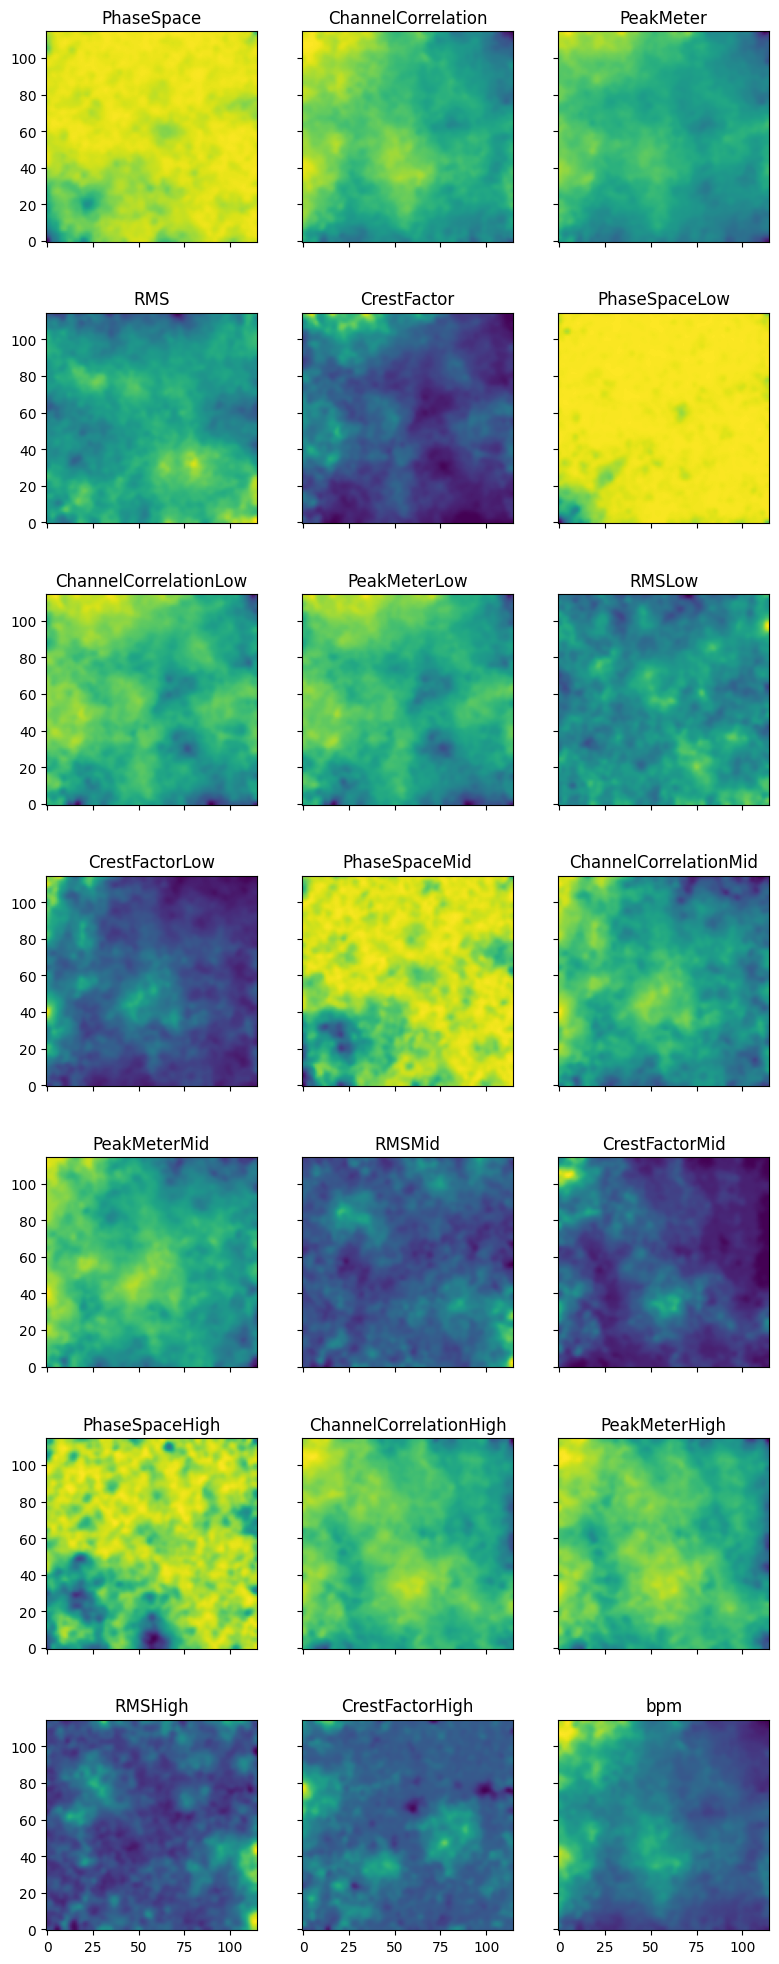

In [23]:
#Plot component plate, each subplot is a feature selected above
fig, (axs) = plt.subplots(7, 3, figsize=(8, 20), sharex=True, sharey=True)
fig.tight_layout()
for i, (fn, ax) in enumerate(zip(nfeatures, axs.flatten())):
    ax.set_title(features[nfeatures[fn]])
    ax.imshow(som.weights[:, i].reshape(som.shape), origin='lower', aspect='equal')

In [24]:
fig.savefig(r'C:\python\maps\components-all-21features-median.png')